# Car Accident Severity

## Introduction (Business Understanding)

 Car Accidents have always had a huge impact on our society as they result in injuries, deaths and loss of capital. The value of the loss caused by an accident is known as the Accident severity. Accidents have become very common these days and the attention of researchers to determine the severity of the driver’s injuries has increased because not only does it concern the driver himself but also the officials as they can act quicker, build safer roads for the future and it is useful in determining the premiums for accident insurance. Therefore, it is essential that insurers have all the required data and information when it comes to pricing insurance products and providing new methods to improve the quantification of risk based on data. Furthermore, every accident analysis is based on accurate and comprehensive records which we will be using in this project. We are dealing with all the possible ways to reach the destination by predicting and overcoming the severity of the accident with all the different traffic conditions in order to improve the traffic safety measures and rules. The objectives of this car accident severity capstone project are collecting a database of car accidents that includes the factors (as light conditions, weather, road surface…) that affect built up roads’ safety, analyzing data from the dataset suggested, determining the type of roads that have the highest and the lowest rate of accidents and finally propose measures to take regarding the factors and determine the riskiest road in order to improve the safety.

## Data Description

For this project, we will be using the python language and execute it in Watson studio IBM. After understanding the data (picking the right APIs for each file, studying the type of each attribute in each column, finding the NAN values…), we prepare the data by framing it, cleaning it, removing any unnecessary information and making it ready to be modeled. We will implement many machine learning techniques as the K-nearest neighbor method and decision tree to predict the relationship between the dependent and independent variables. Then, we use the Jacob and F-1 square methods to evolve the model. Now we get to visualizing the data using different plots like matplotlib and seaborn functions, in order to find the best possible solutions to reduce the car accident severity.
The data used from the suggested dataset gives all the informations needed regarding the accidents that occured in seattle from 2014 to 2020.
The main attributes of this analysis will be the weather, the road, the light, the junction type, the underinfl and the day of the week.

## Methodoly

We start by importing all the libraries we need:


In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
%matplotlib inline

Then we take a look at the dataset we want to analyze:

In [2]:
name = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df_acc = pd.read_csv(name)
df_acc.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


We examine the shape of the data then the type of each attribute:

In [3]:
df_acc.shape

(194673, 38)

In [4]:
df_acc.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

We first study the relationship between the severity and the weather condition:

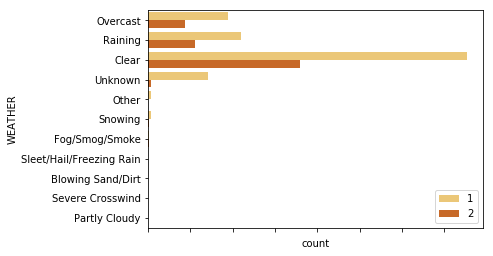

In [5]:
ax = sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df_acc, palette='YlOrBr')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

Second, we study the relationship between the severity and the light condition:

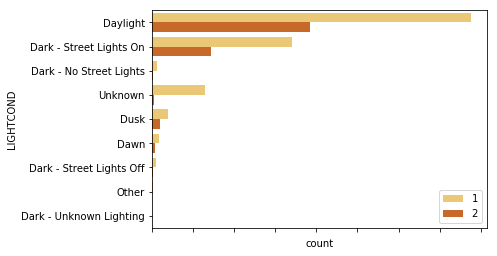

In [6]:
ax = sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df_acc, palette='YlOrBr')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

Relationship between car accident severity and the day of the week


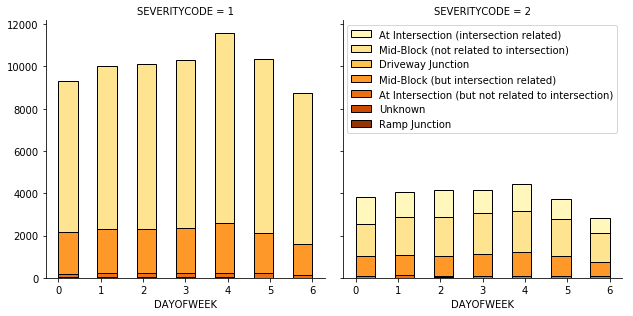

In [7]:
df_acc['INCDATE']= pd.to_datetime(df_acc['INCDATE'])
df_acc['DAYOFWEEK'] = df_acc['INCDATE'].dt.dayofweek
bins = np.linspace(df_acc.DAYOFWEEK.min(), df_acc.DAYOFWEEK.max(), 14)
g = sns.FacetGrid(df_acc, col='SEVERITYCODE', hue = 'JUNCTIONTYPE', palette="YlOrBr", col_wrap=4,height=4.5, aspect=0.95)
g.map(plt.hist, 'DAYOFWEEK', bins=bins, ec="k")
g.axes[-1].legend(loc = 'upper right')
plt.show()

Relationship between car accident severity and the road condition:

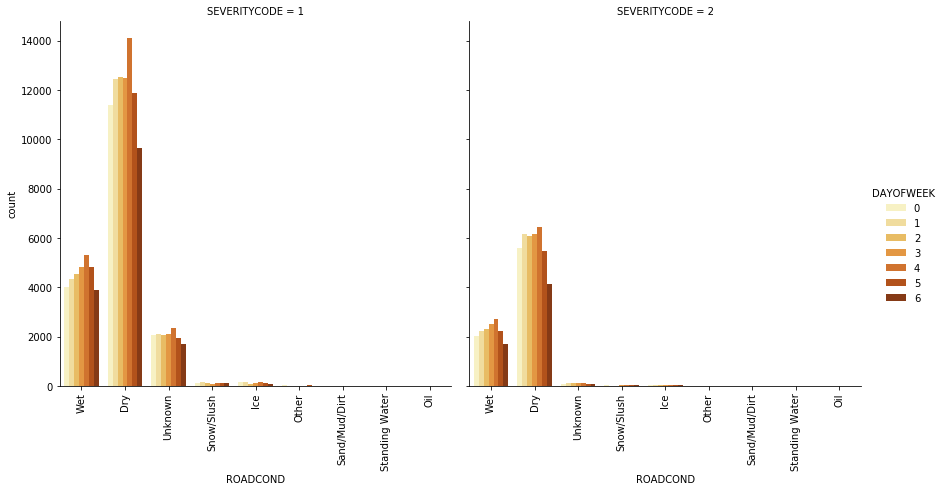

In [8]:
ax = sns.catplot(x="ROADCOND", col="SEVERITYCODE", hue='DAYOFWEEK',
              data=df_acc, kind="count",
              height=6, aspect=1,palette='YlOrBr')
ax.set_xticklabels( rotation=90)

Relationship between car accident severity and the driver's condition:

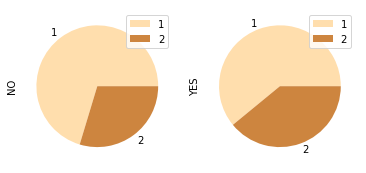

In [9]:
df_acc['COUNT']=1
df_acc['UNDERINFL'] = df_acc['UNDERINFL'].apply(lambda x: 'NO' if (x=='0')|(x=='N') else 'YES' if  (x=='1')|(x=='Y') else x)
UNDERINFL = df_acc.groupby(['UNDERINFL','SEVERITYCODE']).sum()['COUNT']
UNDERINFL.unstack().transpose().plot.pie(subplots = True, colors = ['navajowhite','peru'])
plt.show()

Relationship between car accident severity and the type of junction:

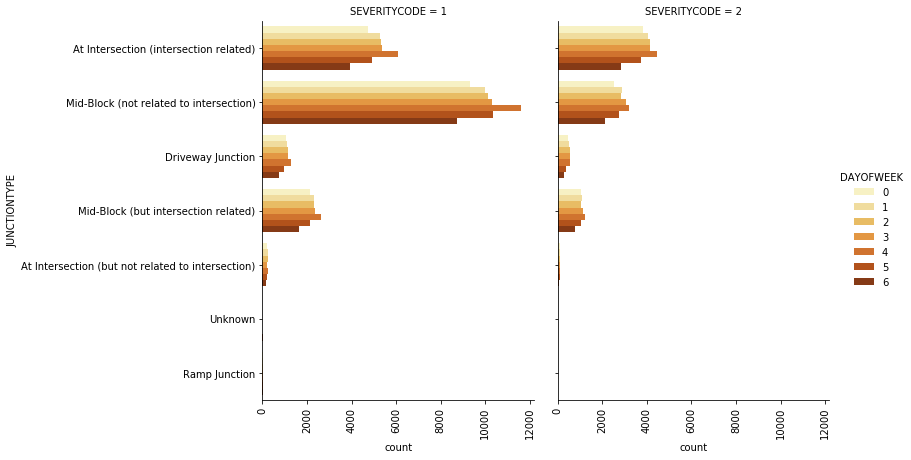

In [10]:
ax = sns.catplot(y="JUNCTIONTYPE", col="SEVERITYCODE", hue='DAYOFWEEK',
              data=df_acc, kind="count",
              height=6, aspect=1,palette='YlOrBr')
ax.set_xticklabels( rotation=90)

Finally, we get the location of the accidents by visualizing the map of Seattle:

In [11]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

the map will be shown in the report 

In [25]:
location=df_acc.groupby(['Y','X','LOCATION','SEVERITYCODE']).size().reset_index(name='count').sort_values(by='count',ascending=False)
location=location[location['count']>=1]
location['color']=location['SEVERITYCODE'].apply(lambda SEVERITYCODE:"red" if SEVERITYCODE == 2 else
                                         "Blue")
location['size']=location['count'].apply(lambda count:10 if count>=250 else
                                         8 if count>=150 and count<250 else
                                         6 if count>=50 and count<150 else
                                         None)
location.head()

,Y,X,LOCATION,SEVERITYCODE,count,color,size
32746,47.708655,-122.332653,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,1,171,Blue,8.0
34080,47.725036,-122.344997,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,1,151,Blue,8.0
13214,47.604161,-122.328079,6TH AVE AND JAMES ST,1,145,Blue,6.0
15044,47.612991,-122.345863,1ST AVE BETWEEN BLANCHARD ST AND BELL ST,1,140,Blue,6.0
10127,47.579673,-122.299160,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,1,137,Blue,6.0


In [29]:
seattle_map=folium.Map([47.6062, -122.3321],zoom_start=12)

for lat,lon,area,color,count,size in zip(location['Y'],location['X'],location['LOCATION'],location['color'],location['count'],location['size']):
     folium.CircleMarker([lat, lon],
                            popup=area,
                            radius=size,
                            color='b',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color=color,
                           ).add_to(seattle_map)
seattle_map.save('seattlemap.html')

In [30]:
f = df_acc.loc[:,['PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']]
f['PEDCYLCOUNT'].value_counts()

0    189189
1      5441
2        43
Name: PEDCYLCOUNT, dtype: int64

In [15]:
locationn=df_acc.groupby(['Y','X','LOCATION','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SEVERITYCODE']).size().reset_index(name='count').sort_values(by='count',ascending=False)
locationn=locationn[locationn['count']>=1]
locationn['icon']=locationn['PEDCYLCOUNT'].apply(lambda x: 'bicycle' if x!=0 else
                                         'car-crash')
locationn['color']=locationn['SEVERITYCODE'].apply(lambda SEVERITYCODE:"red" if SEVERITYCODE == 2 else
                                         "Blue")
locationn.head()

,Y,X,LOCATION,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SEVERITYCODE,count,icon,color
56743,47.708655,-122.332653,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,0,0,2,1,151,car-crash,Blue
22574,47.604161,-122.328079,6TH AVE AND JAMES ST,0,0,2,1,129,car-crash,Blue
26607,47.612991,-122.345863,1ST AVE BETWEEN BLANCHARD ST AND BELL ST,0,0,2,1,126,car-crash,Blue
59041,47.725036,-122.344997,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,0,0,2,1,122,car-crash,Blue
16753,47.579673,-122.299160,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,0,0,2,1,119,car-crash,Blue


In [ ]:
seattle2_map=folium.Map([47.6062, -122.3321],zoom_start=12)
for lat,lon,area,color,count,icon in zip(locationn['Y'],locationn['X'],locationn['LOCATION'],locationn['color'],locationn['count'],locationn['icon']):
     folium.Marker([lat, lon],
                            popup= area,
                            icon=folium.Icon(icon=icon, color=color),).add_to(seattle2_map)
seattle2_map

## Machine learning models

Get the number of null value for each attribute

In [11]:
null_columns=df_acc.columns[df_acc.isnull().any()]
print('Number of null value for each attribute:')
df_acc[null_columns].isnull().sum()

Number of null value for each attribute:


X                   5334
Y                   5334
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
COLLISIONTYPE       4904
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
dtype: int64

In [12]:
print(df_acc['SEVERITYCODE'].value_counts())

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


The data is unbalenced that is why we need to equalize the 2 types of severity

In [13]:
df_acc = df_acc.loc[:,["ROADCOND","LIGHTCOND",'WEATHER','DAYOFWEEK','UNDERINFL','JUNCTIONTYPE','SEVERITYCODE']]
df_acc.isnull().sum()

ROADCOND        5012
LIGHTCOND       5170
WEATHER         5081
DAYOFWEEK          0
UNDERINFL       4884
JUNCTIONTYPE    6329
SEVERITYCODE       0
dtype: int64

In [14]:
print('The number of null value (to drop) in each type of accident:')
print(df_acc[df_acc.isna().any(axis=1)]['SEVERITYCODE'].value_counts())


The number of null value (to drop) in each type of accident:
1    9958
2    1519
Name: SEVERITYCODE, dtype: int64


In [15]:
df_acc = df_acc.dropna()
df_acc['SEVERITYCODE'].value_counts()

1    126527
2     56669
Name: SEVERITYCODE, dtype: int64

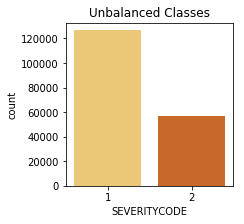

In [16]:
df_acc['UNDERINFL'] = df_acc['UNDERINFL'].apply(lambda x: '1' if x=='YES' else '0' )
plt.figure(figsize=(3, 3))
sns.countplot(x='SEVERITYCODE', data=df_acc, palette='YlOrBr')
plt.title('Unbalanced Classes')
plt.show()

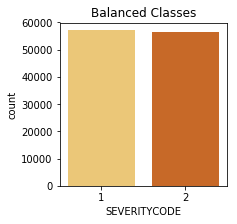

In [17]:
shuffled_df = df_acc.sample(frac=1,random_state=4)
fraud_df = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == 2]
non_fraud_df = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == 1].sample(n=57052,random_state=42)
normalized_df  = pd.concat([fraud_df, non_fraud_df])
plt.figure(figsize=(3, 3))
sns.countplot(x='SEVERITYCODE', data=normalized_df, palette='YlOrBr')
plt.title('Balanced Classes')
plt.show()

In [18]:
def one_hot_code(df, columns):
    for col in columns:
        dummy = pd.get_dummies(df[col], prefix=col)
        if col+"_Unknown" in dummy.columns:
            dummy.drop(columns=[col+"_Unknown"], inplace=True)
        elif col+"_Others" in dummy.columns:
            dummy.drop(columns=[col+"_Other"], inplace=True)
        else:
            dummy.drop(columns=[dummy.columns[-1]], inplace=True)
        df = pd.concat([df, dummy], axis=1)
        df.drop(columns=[col], inplace = True)  
    return df

hotcoding = ['WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','DAYOFWEEK']
data = one_hot_code(normalized_df, hotcoding)
data.columns
data= data.sample(frac=1)
data.head()

,UNDERINFL,SEVERITYCODE,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,...,JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,DAYOFWEEK_0,DAYOFWEEK_1,DAYOFWEEK_2,DAYOFWEEK_3,DAYOFWEEK_4,DAYOFWEEK_5
141639,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
111107,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
132791,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
33683,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15440,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [19]:
df_x = data.drop(columns='SEVERITYCODE')
df_y = data['SEVERITYCODE']
df_x.head()

,UNDERINFL,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,...,JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,DAYOFWEEK_0,DAYOFWEEK_1,DAYOFWEEK_2,DAYOFWEEK_3,DAYOFWEEK_4,DAYOFWEEK_5
141639,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
111107,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
132791,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
33683,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15440,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4, shuffle = True)
print('Train set shape:', X_train.shape, y_train.shape)
print('Test set shape:',X_test.shape, y_test.shape)

Train set shape: (90976, 39) (90976,)
Test set shape: (22745, 39) (22745,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


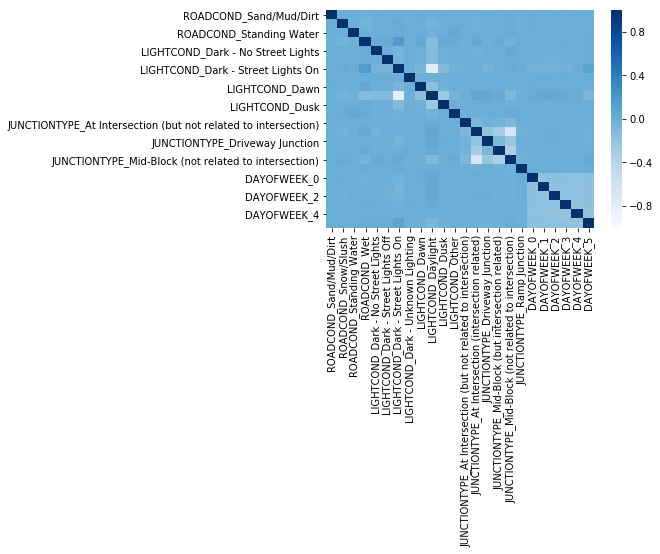

In [71]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
importance = model.feature_importances_

less_imp = pd.DataFrame(columns=["Feature", "Importance"]) 
for i,v in enumerate(importance):
    less_imp = less_imp.append({"Feature":X_train.columns[i], "Importance":v}, ignore_index=True)
less_imp.sort_values(['Importance'],ascending = True)
X_train.drop(columns=less_imp.iloc[:15, :]["Feature"].to_list(), inplace=True)
X_test.drop(columns=less_imp.iloc[:15, :]["Feature"].to_list(), inplace=True)
y_train.drop(columns=less_imp.iloc[:15, :]["Feature"].to_list(), inplace=True)
y_test.drop(columns=less_imp.iloc[:15, :]["Feature"].to_list(), inplace=True)
corr = X_train.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center= 0, cmap='Blues')

The output of every line of code till the end will be shown in the report

## K Nearest Neighbor(KNN)

In [22]:
from sklearn.metrics import f1_score, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression

In [ ]:
k=20
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
PredKNN = KNN.predict(X_train)
acc_train = metrics.accuracy_score(y_train, KNN.predict(X_train))
acc_test = metrics.accuracy_score(y_test, PredKNN)
print('Accuracy of the training set:', acc_train)
print('Accuracy of the test set:', acc_test)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

f1score = []
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
for i in range(1,50):
    x = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    y = x.fit(X_train,y_train)
    r = f1_score(y_test,y.predict(X_test),average='weighted')
    f1score.append(r)
plt.plot(range(1,50),f1score, 'g')
print('The maximum score possible is:',max(f1score))
PREDRFC = tree.fit(X_train,y_train).predict(X_train)
print(classification_report(y_train,PREDRFC))

## SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
PredSVM = clf.predict(X_test)
f1_score(y_test,PredSVM,average='weighted')

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
PredLr = lr.predict(X_test)
PredLr_proba = lr.predict_proba(X_test)
PREDLR = lr.predict(X_train)
print(classification_report(y_train,PREDLR))

## Random Forest Classifier

In [ ]:
RFC = RandomForestClassifier(random_state = 42).fit(X_train,y_train)
PREDRFC = cross_val_predict(RFC, X_train, y_train, cv=5)
accuracy = accuracy_score(y_train, PREDRFC)
print("Model: Random Forest")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Report:")
print(classification_report(y_train,PREDRFC))

## Model Testing using Test set

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
PredKNN = KNN.predict(X_test)
Predtree = tree.predict(X_test)
PredSVM = clf.predict(X_test)
PredLr = lr.predict(X_test)
PredRFC = RFC.predict(X_test)

In [ ]:
JKNN = jaccard_similarity_score(y_test, PredKNN)
Jtree = jaccard_similarity_score(y_test, Predtree)
JSVM = jaccard_similarity_score(y_test, PredSVM)
JLr = jaccard_similarity_score(y_test, PredLr)
JRFC = jaccard_similarity_score(y_test, PredRFC)

FKNN = f1_score(y_test, PredKNN, average='weighted')
Ftree = f1_score(y_test, Predtree, average='weighted')
FSVM = f1_score(y_test, PredSVM, average='weighted')
FLr = f1_score(y_test, PredLr, average='weighted')
FRFC = f1_score(y_test, PredRFC, average='weighted')

LLr = log_loss(y_test, lr.predict_proba(X_test))

report = pd.DataFrame({'Algorithm': ['KNN','Decision Tree','SVM','RandomForest','LogisticRegresson'], 'Jaccard':[JKNN , Jtree, JSVM, JRFC, JLr] , 'F1_score':[FKNN , Ftree, FSVM, FRFC, FLr] , 'LogLoss':['NA', 'NA','NA','NA',LLr]})
report